<a href="https://colab.research.google.com/github/JaydenJonathan/all-my-projects/blob/main/AI_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NEURAL NETWORK LETS SPEEDRUN FIS LEZ GOOO(BEST ENTERTAINMENT)**

# **VERY BASIC NEURAL NETWORK**(not done :/)

epoch: 0, losses: 1.1251550912857056
epoch: 10, losses: 1.0096259117126465
epoch: 20, losses: 0.8157405853271484
epoch: 30, losses: 0.585706353187561
epoch: 40, losses: 0.3999636471271515
epoch: 50, losses: 0.26768800616264343
epoch: 60, losses: 0.17942361533641815
epoch: 70, losses: 0.12151690572500229
epoch: 80, losses: 0.0860118493437767
epoch: 90, losses: 0.06520850956439972


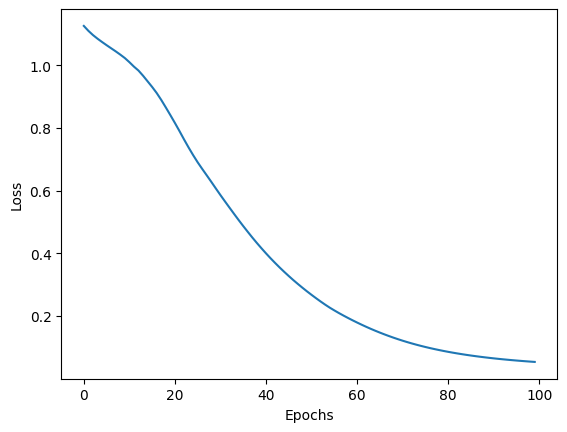

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # Fixed import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

# Convert species to integers, not strings
my_df['species'] = my_df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_feature=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_feature)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

torch.manual_seed(41)
model = Model()

x = my_df.drop('species', axis=1).values
y = my_df['species'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)  # This will now work
y_test = torch.LongTensor(y_test)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(x_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 10 == 0:
      print(f'epoch: {i}, losses: {loss}')


plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Your Chinese character dataset
chinese_chars = "火车开仓颉你是好的没有他们门"
print(f"Characters we're learning: {chinese_chars}")

# Create character mappings
char_to_idx = {char: idx for idx, char in enumerate(chinese_chars)}
idx_to_char = {idx: char for idx, char in enumerate(chinese_chars)}
vocab_size = len(chinese_chars)

# Create training data
sequences = [
    "你是好", "你好吗", "他们没有", "开门", "火车开",
    "不好", "好的", "有没有", "他们好", "开门吗"
]

# Convert sequences to numerical data
def create_training_data(sequences, seq_length=2):
    X, y = [], []
    for seq in sequences:
        for i in range(len(seq) - seq_length):
            input_seq = seq[i:i + seq_length]
            target_char = seq[i + seq_length]
            X.append([char_to_idx[char] for char in input_seq])
            y.append(char_to_idx[target_char])
    return torch.tensor(X), torch.tensor(y)

X, y = create_training_data(sequences)

# Simple neural network
class ChineseCharModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=32, hidden_dim=64):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        last_output = lstm_out[:, -1, :]
        output = self.fc(last_output)
        return output

# Create and train model
model = ChineseCharModel(vocab_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 500
losses = []
accuracies = []

print("Training Chinese Character AI...")
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y).float().mean()
    accuracies.append(accuracy.item())

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}')

print("Training completed!")

# 🎨 CREATE BEAUTIFUL PLOTS 🎨
plt.figure(figsize=(15, 5))

# Plot 1: Training Loss
plt.subplot(1, 3, 1)
plt.plot(losses, color='red', linewidth=2)
plt.title('Training Loss Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Plot 2: Training Accuracy
plt.subplot(1, 3, 2)
plt.plot(accuracies, color='green', linewidth=2)
plt.title('Training Accuracy Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Plot 3: Character Frequency (Data Visualization)
plt.subplot(1, 3, 3)
# Count how often each character appears in training data
char_counts = {}
for seq in sequences:
    for char in seq:
        char_counts[char] = char_counts.get(char, 0) + 1

# Create bar chart
chars = list(char_counts.keys())
counts = list(char_counts.values())
colors = plt.cm.Set3(np.linspace(0, 1, len(chars)))

plt.bar(chars, counts, color=colors)
plt.title('Character Frequency in Training Data', fontsize=14, fontweight='bold')
plt.xlabel('Chinese Characters')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# 📊 Additional Plot: Loss vs Accuracy
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
# Normalize loss for better comparison
normalized_loss = [loss/max(losses) for loss in losses]
normalized_acc = accuracies

plt.plot(normalized_loss, label='Loss (normalized)', color='red', alpha=0.7)
plt.plot(normalized_acc, label='Accuracy', color='blue', alpha=0.7)
plt.title('Loss vs Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True, alpha=0.3)

# Final accuracy by character
plt.subplot(1, 2, 2)
model.eval()
with torch.no_grad():
    char_accuracy = {}
    for char in chinese_chars:
        # Find all examples where this character is the target
        char_idx = char_to_idx[char]
        char_mask = (y == char_idx)
        if char_mask.sum() > 0:  # If we have examples
            char_outputs = outputs[char_mask]
            char_targets = y[char_mask]
            _, char_predicted = torch.max(char_outputs, 1)
            char_acc = (char_predicted == char_targets).float().mean()
            char_accuracy[char] = char_acc.item()

# Plot character-wise accuracy
chars_acc = list(char_accuracy.keys())
acc_values = list(char_accuracy.values())
colors = ['green' if acc > 0.7 else 'orange' if acc > 0.4 else 'red' for acc in acc_values]

plt.bar(chars_acc, acc_values, color=colors)
plt.title('Accuracy per Chinese Character')
plt.xlabel('Characters')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# 🎯 Prediction Function
def predict_next_chars(start_chars, num_predictions=3):
    model.eval()
    with torch.no_grad():
        current_sequence = start_chars
        print(f"\nStarting with: '{start_chars}'")
        predictions = []

        for i in range(num_predictions):
            input_seq = torch.tensor([[char_to_idx[char] for char in current_sequence]])
            output = model(input_seq)
            probabilities = torch.softmax(output, dim=1)
            predicted_idx = torch.argmax(probabilities, dim=1).item()
            predicted_char = idx_to_char[predicted_idx]

            confidence = probabilities[0][predicted_idx].item()
            predictions.append((current_sequence, predicted_char, confidence))

            print(f"Step {i+1}: '{current_sequence}' → '{predicted_char}' (confidence: {confidence:.3f})")
            current_sequence = current_sequence[1:] + predicted_char

        return predictions

# 📈 Test predictions
print("\n" + "="*50)
print("🤖 CHINESE CHARACTER AI PREDICTIONS")
print("="*50)

test_inputs = ["你是", "他们", "开门", "火车", "好不"]
for test_input in test_inputs:
    predict_next_chars(test_input, 2)

# 🎮 Interactive mode
print(f"\n🎮 Interactive Mode - Try your own sequences!")
print(f"Available characters: {chinese_chars}")

def interactive_mode():
    while True:
        user_input = input("\nEnter 2 starting characters (or 'quit'): ")
        if user_input.lower() == 'quit':
            break
        if len(user_input) == 2 and all(c in chinese_chars for c in user_input):
            predict_next_chars(user_input, 3)
        else:
            print("Please enter exactly 2 characters from our list!")

interactive_mode()

print(f"\n🎉 训练完成! Your Chinese character AI is ready!")  # Training completed!